# <u>Data Science Essentials</u>

## <u>Topic</u>: Learning Curves

## <u>Category</u>: Model Evaluation

### <u>Created By</u>: Mohammed Misbahullah Sheriff
- [LinkedIn](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import sklearn

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
)

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import learning_curve

## Getting the Data

In [ ]:
path = "/content/car-details.csv"

df = pd.read_csv(path)
print("Data Shape:", df.shape)
df.head()

Data Shape: (6926, 16)


,name,company,model,edition,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1.5 TDI Ambition,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,Honda,City,2017-2020 EXi,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,i20,Sportz Diesel,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


In [ ]:
X = df.drop(columns=["name", "edition", "selling_price"])
y = df.selling_price.copy()

print(X.shape, y.shape)

(6926, 13) (6926,)


## Demo

### Data Preprocessing

In [ ]:
num_cols = X.select_dtypes(include="number").columns
obj_cols = X.select_dtypes(exclude="number").columns

num_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

num_pipe = Pipeline(steps=[("imputer", num_imputer),
                           ("scaler", scaler)])

obj_imputer = SimpleImputer(strategy="most_frequent")
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

obj_pipe = Pipeline(steps=[("imputer", obj_imputer),
                           ("encoder", encoder)])

preprocessor = ColumnTransformer(transformers=[("num", num_pipe, num_cols),
                                               ("obj", obj_pipe, obj_cols)])

model = Pipeline(steps=[("pre", preprocessor),
                        ("reg", RandomForestRegressor())])

### Generating the Learning Curve

In [ ]:
train_sizes, train_scores, val_scores, fit_times, score_times = learning_curve(model,
                                                                               X,
                                                                               y,
                                                                               train_sizes=np.linspace(0.1, 1.0, 7),
                                                                               cv=5,
                                                                               scoring="r2",
                                                                               n_jobs=-1,
                                                                               random_state=1,
                                                                               return_times=True)

In [ ]:
train_sizes

array([ 554, 1385, 2216, 3046, 3877, 4709, 5540])

In [ ]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)

mean_val_scores = np.mean(val_scores, axis=1)
std_val_scores = np.std(val_scores, axis=1)

mean_fit_times = np.mean(fit_times, axis=1)
std_fit_times = np.std(fit_times, axis=1)

mean_scoring_times = np.mean(score_times, axis=1)
std_scoring_times = np.std(score_times, axis=1)

### Plotting the Learning Curve

In [ ]:
def plot_curves(mean_scores,
                std_scores,
                ylabel,
                ax,
                marker="s",
                label=None,
                title=None):
  """

  Description:
  ------------
  This function will plot the relationship between the given input arrays
  w.r.t. the varying sizes of the training set along with user-specified customizations for aesthetics

  Parameters:
  -----------
  mean_scores: array (n_train_sizes,)
               Array of mean scores calculated across each of the cross-validation folds

  std_scores: array (n_train_sizes,)
              Array of standard deviation of scores calculated across each of the cross-validation folds

  ylabel: str
          The y-label for the plot

  ax: matplotlib axes
      The axes to draw the plot over

  marker: str
          The marker symbol to use for the plot

  label: str
         The label to use for the plot

  title: str
         The title to use for the plot

  """
  ax.plot(train_sizes,
          mean_scores,
          marker=marker,
          label=label)
  ax.fill_between(train_sizes,
                  mean_scores - std_scores,
                  mean_scores + std_scores,
                  alpha=0.5)
  ax.set(xlabel="Train Set Sizes",
         ylabel=ylabel,
         title=title)

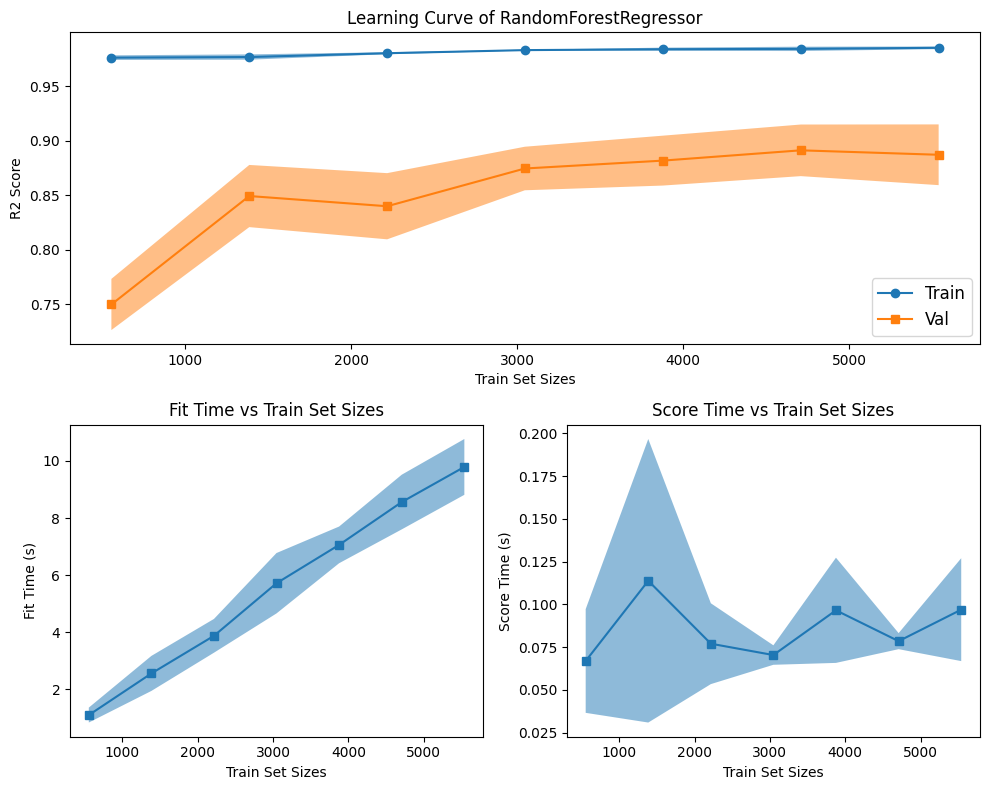

In [ ]:
fig = plt.figure(figsize=(10, 8))

grid = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])

# 1st axes (top)
plot_curves(mean_train_scores,
            std_train_scores,
            ylabel="R2 Score",
            marker="o",
            label="Train",
            ax=ax1)
plot_curves(mean_val_scores,
            std_val_scores,
            ylabel="R2 Score",
            marker="s",
            label="Val",
            title=f"Learning Curve of {model['reg'].__class__.__name__}",
            ax=ax1)
ax1.legend(loc="lower right", fontsize=12)

# 2nd axes (bottom left)
plot_curves(mean_fit_times,
            std_fit_times,
            ylabel="Fit Time (s)",
            marker="s",
            title=f"Fit Time vs Train Set Sizes",
            ax=ax2)

# 3rd axes (bottom right)
plot_curves(mean_scoring_times,
            std_scoring_times,
            ylabel="Score Time (s)",
            marker="s",
            title=f"Score Time vs Train Set Sizes",
            ax=ax3)


plt.tight_layout()
plt.show()

### Observations:

- From the learning curve, it can be seen that the training score is comparatively much higher than the validation score for any given size of the training set
- As the training set gets bigger, the difference between the training and validation scores decreases slightly
- This behaviour is typical for a model that is `over-fitting`
- As the training set gets bigger, the time taken to train the model also increases nearly linearly
- As the training set gets bigger, the time taken to score the model remains more or less the same on average
- The scoring time gets more consistent as the training set size increases